---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

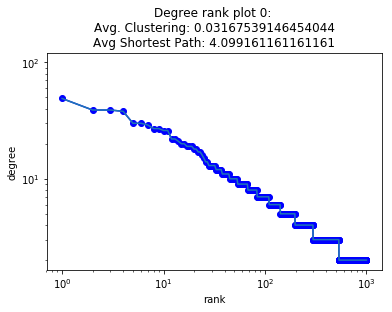

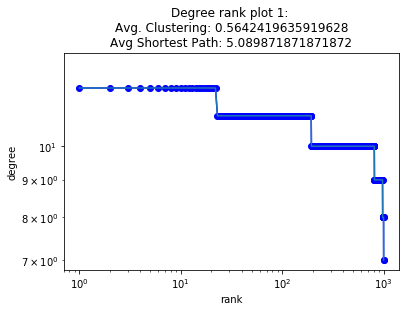

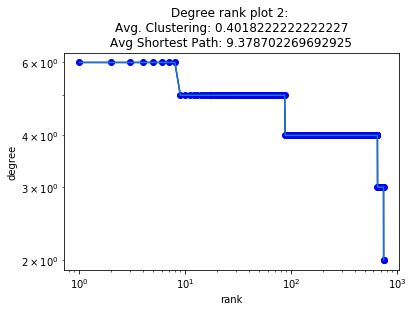

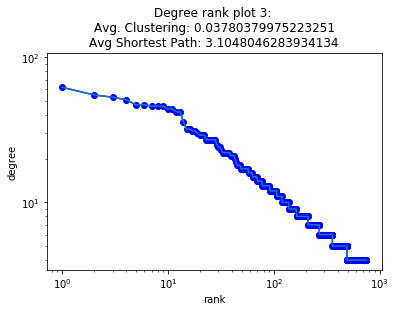

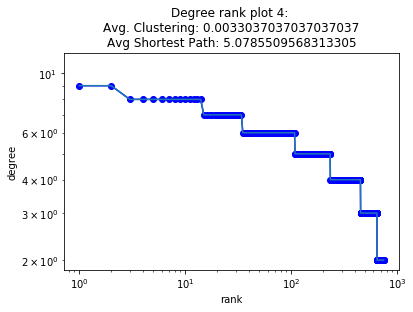

In [35]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
from matplotlib import pyplot as plt
import collections
"""
for i in range(5):
    G=P1_Graphs[i]
    plt.figure(i)
    degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
    dmax=max(degree_sequence)
    plt.loglog(degree_sequence,'b-',marker='o')
    title_2 = ('Avg. Clustering: {}'.format(str(nx.average_clustering(G))))
    title_3 = ('Avg Shortest Path: {}'.format(str(nx.average_shortest_path_length(G))))
    plt.title('Degree rank plot {}: \n{}\n{}'.format(str(i),title_2, title_3))
    plt.ylabel('degree')
    plt.xlabel('rank')
    plt.plot(degree_sequence)
    
    
plt.show()"""

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [31]:
def graph_identification():
    
    
    return ['PA','SW_L','SW_L','PA','SW_H']

['PA', 'SW_L', 'SW_H', 'PA', 'SW_L']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [2]:
G = nx.read_gpickle('email_prediction.txt')

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [88]:
def salary_predictions():
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score
    from sklearn import svm
    
    #Load data into dataframe from a dict of dicts.
    data={}
    data['node']=dict(zip([x for x in G.nodes()], [x for x in G.nodes()]))
    data['Department'] = nx.get_node_attributes(G,'Department')
    data['ManagementSalary'] = nx.get_node_attributes(G,'ManagementSalary')
    data['Degree'] = G.degree()
    data['Closeness'] = nx.closeness_centrality(G)
    data['Clustering'] = nx.clustering(G)
    df=pd.DataFrame(data)
    
    #now get a list of known management salary booleans and split the data into train_test_splits
    df_known = df[df['ManagementSalary']>=0].copy()
    X = df_known[['Closeness','Degree','Department','Clustering']]
    y = df_known[['ManagementSalary']]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    m = LogisticRegression()
    m.fit(X_train,y_train)
    preds = np.array(m.predict_proba(X_test))[:,1]
    auc = roc_auc_score(y_test,preds)
    #print(auc)
    df2 = df[df['ManagementSalary'].apply(np.isnan)]
    some_data = np.array(m.predict_proba(df2[['Closeness','Degree','Department','Clustering']]))
    ser = pd.Series(data=some_data[:,1], index=df2['node'])
    return ser

0.843815513627


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


node
1       0.851120
2       0.420934
5       0.038175
8       0.873324
14      0.651632
18      0.823330
27      0.733530
30      0.682276
31      0.814798
34      0.871488
37      0.878136
40      0.757372
45      0.825093
54      0.756771
55      0.809567
60      0.790590
62      0.005009
65      0.561030
77      0.929627
79      0.877996
97      0.902063
101     0.918213
103     0.813391
108     0.876306
113     0.537926
122     0.934683
141     0.578045
142     0.089517
144     0.910920
145     0.587333
          ...   
913     0.932381
914     0.912848
915     0.982543
918     0.891408
923     0.946877
926     0.915642
931     0.928728
934     0.958971
939     0.971952
944     0.979905
945     0.949533
947     0.906630
950     0.846987
951     0.939888
953     0.951897
959     0.984331
962     0.982358
963     0.851710
968     0.917181
969     0.923401
974     0.937907
984     0.960423
987     0.909236
989     0.923787
991     0.899900
992     0.983210
994     0.980730
996     0

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [3]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [65]:
def new_connections_predictions():
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score
    from sklearn import svm
    
    def get_edge_att(s,f):
        #get jaccard coeff, preferential_attachment, and
        #resource_allocation for a given node edge
        jc = 0
        ra = 0
        pa = 0
        G.add_edge(s,f)
        for u,v,p in nx.jaccard_coefficient(G,[(s,f)]):
            jc = p
        for u,v,p in nx.resource_allocation_index(G,[(s,f)]):
            ra = p
        for u,v,p in nx.preferential_attachment(G,[(s,f)]):
            pa = p
        G.remove_edge(s,f)
        return (jc,ra,pa)
    fc=future_connections
    fc['edge'] = fc.index
    fc['stats'] = fc['edge'].apply(lambda x: get_edge_att(x[0],x[1]))
    
    #break stats column into named columns
    new_col_list = ['JC','RA','PA']
    for n,col in enumerate(new_col_list):
        fc[col] = fc['stats'].apply(lambda stats: stats[n])

    
    #train-test-split on the data with known outcomes (0 or 1)
    data = fc[fc['Future Connection'].apply(np.isnan) == False]
    X = data[['JC','RA','PA']]
    y = data[['Future Connection']]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)    
    
    m = LogisticRegression()
    m.fit(X_train,y_train)
    preds = np.array(m.predict_proba(X_test))[:,1]
    auc = roc_auc_score(y_test,preds)
    #print(auc)
    
    #now predict the unknowns
    data2 = fc[fc['Future Connection'].apply(np.isnan)]
    some_data = np.array(m.predict_proba(data2[['JC','RA','PA']]))
    ser = pd.Series(data=some_data[:,1], index=data2['edge'])
    #print(str(len(ser)))
    return ser
new_connections_predictions()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.909729304375
122112


edge
(107, 348)    0.026729
(542, 751)    0.011653
(20, 426)     0.435988
(50, 989)     0.011542
(942, 986)    0.011404
(324, 857)    0.011560
(13, 710)     0.265455
(19, 271)     0.161988
(319, 878)    0.011498
(659, 707)    0.011675
(49, 843)     0.011468
(208, 893)    0.011671
(377, 469)    0.017506
(405, 999)    0.018567
(129, 740)    0.016103
(292, 618)    0.052296
(239, 689)    0.011489
(359, 373)    0.014663
(53, 523)     0.041414
(276, 984)    0.011468
(202, 997)    0.011440
(604, 619)    0.258990
(270, 911)    0.011496
(261, 481)    0.073344
(200, 450)    0.914396
(213, 634)    0.011732
(644, 735)    0.167706
(346, 553)    0.011977
(521, 738)    0.012542
(422, 953)    0.023508
                ...   
(672, 848)    0.011496
(28, 127)     0.766681
(202, 661)    0.012047
(54, 195)     0.999992
(295, 864)    0.011689
(814, 936)    0.011682
(839, 874)    0.011404
(139, 843)    0.011601
(461, 544)    0.012950
(68, 487)     0.013040
(622, 932)    0.011740
(504, 936)    0.021194
(479, 